# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

<strong><span style='color:red'>There were 42 campaigns.</span></strong>

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [333]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score

In [339]:
%matplotlib inline
sns.set_style=('whitegrid')

In [241]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [242]:
len(df['campaign'].unique())

42

In [204]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [225]:
df.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

<strong><span style='color:red'>9280 observations with 21 features.</span></strong>

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



<strong><span style='color:red'>The target classes are imbalanced.</span></strong>

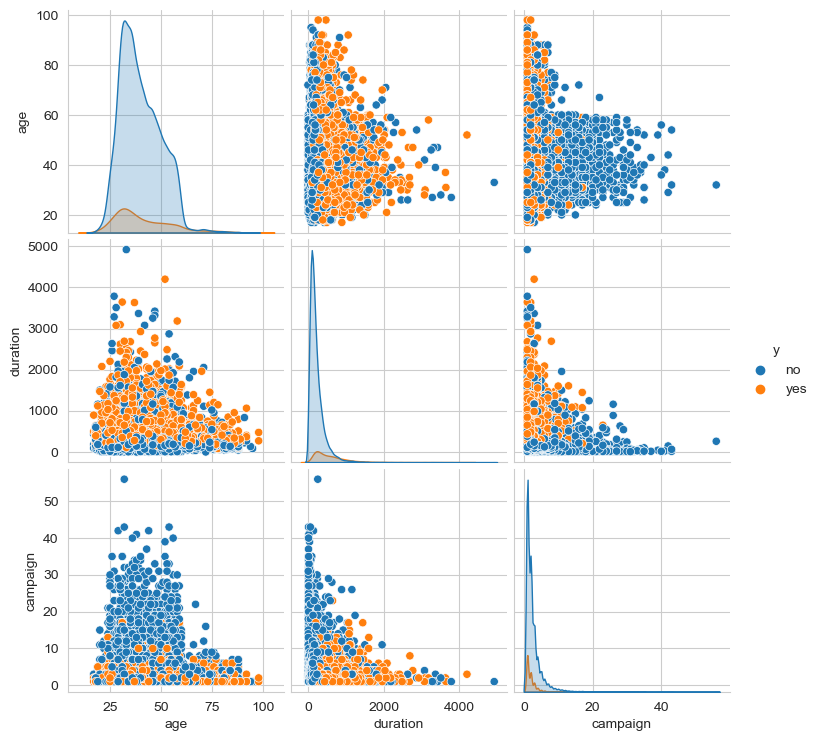

In [236]:
cols_ = ['age', 'duration', 'campaign', 'y']
df_ = df[cols_].copy()

sns.pairplot(df_, hue='y')
plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

<strong><span style='color:red'>What are the features that have the most importance in predicting the correct outcome.</span></strong>

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [251]:
df['y'] = df['y'].map({'no': 0, 'yes': 1}).astype(int)
#df['y'] = df['y'].astype(int)

In [7]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [8]:
df['y'].value_counts()[1]

4640

In [9]:
# balance the classes
filtered_df0 = df[df['y'] == 0]
filtered_df1 = df[df['y'] == 1]

n = df['y'].value_counts()[1]

# Randomly sample from the filtered DataFrame
sampled_df = filtered_df0.sample(n)

In [10]:
df = pd.concat([sampled_df, filtered_df1])
df.reset_index(drop=True, inplace=True)

In [11]:
df['y'].value_counts()

0    4640
1    4640
Name: y, dtype: int64

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [12]:
X = df.iloc[:, :7]
y = df['y']#.map({'no': 0, 'yes': 1})

In [13]:
X

,age,job,marital,education,default,housing,loan
0,29,admin.,married,university.degree,no,no,yes
1,34,technician,single,professional.course,unknown,no,no
2,42,admin.,married,university.degree,no,no,no
3,39,housemaid,married,university.degree,no,no,no
4,34,blue-collar,single,high.school,no,no,no
...,...,...,...,...,...,...,...
9275,62,retired,married,university.degree,no,yes,no
9276,62,retired,married,university.degree,no,no,no
9277,37,admin.,married,university.degree,no,yes,no
9278,73,retired,married,professional.course,no,yes,no


In [14]:
y.value_counts()

0    4640
1    4640
Name: y, dtype: int64

In [15]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']

In [16]:
le = LabelEncoder()
X[cat_cols] = X[cat_cols].apply(le.fit_transform)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        9280 non-null   int64
 1   job        9280 non-null   int64
 2   marital    9280 non-null   int64
 3   education  9280 non-null   int64
 4   default    9280 non-null   int64
 5   housing    9280 non-null   int64
 6   loan       9280 non-null   int64
dtypes: int64(7)
memory usage: 507.6 KB


<strong><span style='color:red'>The dataset is ready for the models.</span></strong>

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
X_train

,age,job,marital,education,default,housing,loan
520,36,0,1,6,0,0,0
1881,53,1,1,0,0,2,0
7913,58,10,0,2,0,2,0
4383,56,7,0,3,1,2,0
8654,53,4,0,6,0,0,0
...,...,...,...,...,...,...,...
200,32,0,1,6,0,2,0
5530,54,6,1,2,1,2,0
8421,73,5,2,5,0,0,0
5854,35,0,1,6,0,2,0


In [20]:
y_train.value_counts()

0    3736
1    3688
Name: y, dtype: int64

<strong><span style='color:red'>Balanced classes.</span></strong>

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [21]:
log_reg = LogisticRegression()
#log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')


start_time = time.time()
log_reg.fit(X_train, y_train)
end_time=time.time()

training_time = end_time - start_time

In [22]:
model_results = {
    'Logistic Regression': [],
    'K-Nearest Neighbor': [],
    'Support Vector Machines': [],
    'Decision Tree': [],               
}
model_results['Logistic Regression'].append(training_time)

training_time * 1000 # milliseconds

38.27691078186035

In [23]:
model_results['Logistic Regression'].append(log_reg.score(X_train, y_train)) # training accuracy
model_results['Logistic Regression'].append(log_reg.score(X_test, y_test)) # testing accuracy

In [24]:
model_results

{'Logistic Regression': [0.03827691078186035,
  0.5883620689655172,
  0.5926724137931034],
 'K-Nearest Neighbor': [],
 'Support Vector Machines': [],
 'Decision Tree': []}

In [25]:
# 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan'
print(log_reg.coef_[0])

[ 0.01821684  0.01505296  0.3532225   0.0526082  -0.94931799  0.02165607
 -0.03691215]


In [26]:
print(log_reg.intercept_)

[-1.30738519]


In [27]:
y_pred = log_reg.predict(X_test)
print(y_pred.sum())

1104


In [28]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat
# true positive  (+ predicted correct) | false positive (+ predicted wrong)
# false negative (- predicted wrong)   | true negative  (- predicted correct)

array([[450, 454],
       [302, 650]])

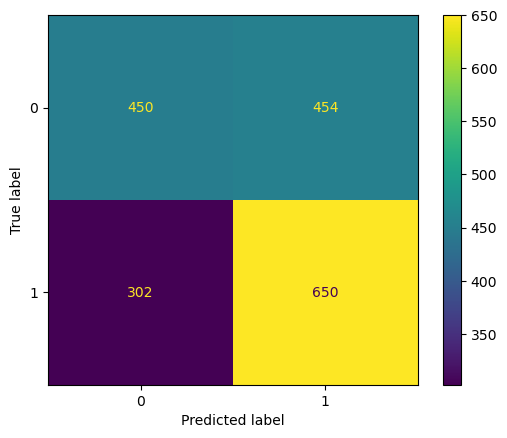

In [29]:
ConfusionMatrixDisplay(conf_mat).plot()
plt.show()

In [30]:
log_reg_report = classification_report(y_test, y_pred)
print(log_reg_report)

              precision    recall  f1-score   support

           0       0.60      0.50      0.54       904
           1       0.59      0.68      0.63       952

    accuracy                           0.59      1856
   macro avg       0.59      0.59      0.59      1856
weighted avg       0.59      0.59      0.59      1856



<strong><span style='color:red'>Baseline model.</span></strong>

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

<strong><span style='color:red'>Logistic Regression is baseline model.</span></strong>

### Problem 9: Score the Model

What is the accuracy of your model?

<strong><span style='color:red'>59%</span></strong>

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [31]:
knn = KNeighborsClassifier()
start_time = time.time()

knn.fit(X_train, y_train)

end_time=time.time()
training_time = end_time - start_time

In [32]:
y_test.shape

(1856,)

In [33]:
y_pred.reshape(-1,)
y_pred.shape

(1856,)

In [34]:
accuracy = accuracy_score(y_test, y_pred) # SAME as training/testing accuracy
accuracy

0.5926724137931034

In [35]:
# CODE ERROR
# y_pred = knn.predict(X_test) # array of predictions used for plotting
# y_pred = y_pred.reshape(1,-1) # rows, cols; -1 means adjust this dimension to make data fit
# knn.score(y_pred, y_test) # this should only test the X,y of train or test

In [36]:
model_results['K-Nearest Neighbor'].append(training_time)
model_results['K-Nearest Neighbor'].append(knn.score(X_train, y_train)) 
model_results['K-Nearest Neighbor'].append(knn.score(X_test, y_test)) 

In [37]:
svm = SVC()
start_time = time.time()

svm.fit(X_train, y_train)

end_time=time.time()
training_time = end_time - start_time

In [38]:
model_results['Support Vector Machines'].append(training_time)
model_results['Support Vector Machines'].append(svm.score(X_train, y_train))
model_results['Support Vector Machines'].append(svm.score(X_test, y_test))

In [39]:
d_tree = DecisionTreeClassifier()
start_time = time.time()

d_tree.fit(X_train, y_train)

end_time=time.time()
training_time = end_time - start_time

In [40]:
model_results['Decision Tree'].append(training_time)
model_results['Decision Tree'].append(d_tree.score(X_train, y_train))
model_results['Decision Tree'].append(d_tree.score(X_test, y_test))

In [41]:
def print_model_metrics_new(data_shape):
    """
    Print the metrics of machine learning models.

    Parameters:
    - data_shape: A dictionary where keys are model names and values are lists containing
                  metrics in the order of [Train Time, Train Accuracy, Test Accuracy].
                  Example format:
                  {
                      'Logistic Regression': [0.088, 0.591, 0.588],
                      ...
                  }

    Returns:
    - None: Prints the metrics in a table format.
    """

    print("| Model                     | Train Time  | Train Accuracy | Test Accuracy | Difference |")
    print("| ------------------------- | ----------- | -------------- | ------------- | ---------- |")

    for model, metrics in data_shape.items():
        train_time = f"{metrics[0]*1000:.2f}s"  
        train_accuracy = f"{metrics[1]*100:.2f}%"  
        test_accuracy = f"{metrics[2]*100:.2f}%"
        difference = f"{(metrics[1] - metrics[2])*100:.2f}%"
        print(f"| {model:25} | {train_time:11} | {train_accuracy:14} | {test_accuracy:13} | {difference}\t|")

In [42]:
print_model_metrics_new(model_results)

| Model                     | Train Time  | Train Accuracy | Test Accuracy | Difference |
| ------------------------- | ----------- | -------------- | ------------- | ---------- |
| Logistic Regression       | 38.28s      | 58.84%         | 59.27%        | -0.43%	|
| K-Nearest Neighbor        | 4.36s       | 70.69%         | 58.14%        | 12.55%	|
| Support Vector Machines   | 791.41s     | 59.32%         | 58.03%        | 1.29%	|
| Decision Tree             | 10.34s      | 84.46%         | 54.36%        | 30.09%	|


In [43]:
# Training Accuracy - how well the model learned on the data it was trained on, accuracy on seen data, expected to be slightly higher
# Testing Accuracy - accuracy on unseen data
# link (https://www.reddit.com/r/learnmachinelearning/comments/r9soc8/training_accuracy_vs_test_accuracy)

# high training vs low testing is indicative of overfitting, learns the noise and outliers
# KNN and D-Trees are overfitting

<strong><span style='color:red'>Present this information in a DataFrame.<br/>KNN and Decision Tree models are overfitting because of the large difference in the accuracies.</span></strong>

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [44]:
log_reg

LogisticRegression()

In [45]:
d_tree

DecisionTreeClassifier()

In [46]:
svm

SVC()

In [47]:
knn

KNeighborsClassifier()

In [48]:
#knn_pipe = Pipeline([
    #('scale', StandardScaler()),
    #('knn', KNeighborsClassifier()),
    #('log', LogisticRegression()),
    #('d-tree', DecisionTreeClassifier()),
    #('svm', SVC())
#])

# knn_pipe.fit(X_train, y_train)
#knn_pipe.get_params()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [49]:
# param_grid are the hyper-parameters to tune
# knn__metric is minkowski, standard Euclidean distance
param_grid = {
    'n_neighbors': range(1,20,2),
    'weights': ['uniform', 'distance'],
    #'algorithm': ['brute'],
    'leaf_size': range(1,30,1)
}

knn_grid = GridSearchCV(knn, param_grid, scoring='accuracy', verbose=1, n_jobs=-1).fit(X_train, y_train)

Fitting 5 folds for each of 580 candidates, totalling 2900 fits


In [50]:
pd.DataFrame(knn_grid.cv_results_).sort_values(by='rank_test_score', ascending=True).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
498,0.001919,0.000444,0.024030,0.006200,25,19,uniform,"{'leaf_size': 25, 'n_neighbors': 19, 'weights'...",0.585859,0.584512,0.582492,0.568350,0.566712,0.577585,0.008295,1
518,0.003269,0.001494,0.022691,0.005434,26,19,uniform,"{'leaf_size': 26, 'n_neighbors': 19, 'weights'...",0.585859,0.584512,0.582492,0.568350,0.566712,0.577585,0.008295,1
558,0.002469,0.000958,0.020234,0.001912,28,19,uniform,"{'leaf_size': 28, 'n_neighbors': 19, 'weights'...",0.585859,0.584512,0.582492,0.568350,0.566712,0.577585,0.008295,1
578,0.002905,0.001178,0.024120,0.007663,29,19,uniform,"{'leaf_size': 29, 'n_neighbors': 19, 'weights'...",0.585859,0.584512,0.582492,0.568350,0.566712,0.577585,0.008295,1
538,0.002239,0.001062,0.021649,0.003437,27,19,uniform,"{'leaf_size': 27, 'n_neighbors': 19, 'weights'...",0.585859,0.584512,0.582492,0.568350,0.566712,0.577585,0.008295,1
478,0.002539,0.001509,0.021572,0.003980,24,19,uniform,"{'leaf_size': 24, 'n_neighbors': 19, 'weights'...",0.585859,0.584512,0.582492,0.568350,0.566712,0.577585,0.008295,1
34,0.004197,0.001698,0.040233,0.008139,2,15,uniform,"{'leaf_size': 2, 'n_neighbors': 15, 'weights':...",0.587205,0.581145,0.569697,0.579125,0.566712,0.576777,0.007547,7
198,0.002624,0.000731,0.022003,0.002633,10,19,uniform,"{'leaf_size': 10, 'n_neighbors': 19, 'weights'...",0.579125,0.581818,0.579798,0.566330,0.575472,0.576508,0.005487,8
158,0.002581,0.000856,0.030105,0.004451,8,19,uniform,"{'leaf_size': 8, 'n_neighbors': 19, 'weights':...",0.579125,0.581818,0.579798,0.566330,0.575472,0.576508,0.005487,8
118,0.003450,0.001079,0.028017,0.005681,6,19,uniform,"{'leaf_size': 6, 'n_neighbors': 19, 'weights':...",0.579125,0.581818,0.579798,0.566330,0.575472,0.576508,0.005487,8


In [52]:
#df = pd.DataFrame(knn_grid.cv_results_)
#best = df[df['rank_test_score'] == 1]
#best

In [53]:
best_params = knn_grid.best_params_ 
best_score = knn_grid.best_score_ # best cross-validation score
train_score = knn_grid.score(X_train, y_train)
test_score = knn_grid.score(X_test, y_test) # test accuracy on unseen data
best_estimator = knn_grid.best_estimator_

In [54]:
best_params

{'leaf_size': 24, 'n_neighbors': 19, 'weights': 'uniform'}

In [55]:
best_score

0.5775847423017234

In [56]:
train_score

0.6450700431034483

In [57]:
test_score

0.5905172413793104

In [58]:
best_estimator

KNeighborsClassifier(leaf_size=24, n_neighbors=19)

# Decision Trees

In [275]:
d_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [276]:
# param_grid are the hyper-parameters to tune
# knn__metric is minkowski, standard Euclidean distance
param_grid = {
    #'ccp_alpha': range(0, 10, 1),
    'ccp_alpha': [0, 0.002, 0.0021, 0.0022, 0.0023, 0.0024, 0.0025, 0.0026],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['random', 'best']
}

d_tree_grid = GridSearchCV(d_tree, param_grid, scoring='accuracy', verbose=1, n_jobs=-1).fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [277]:
best_params = d_tree_grid.best_params_ 
best_score = d_tree_grid.best_score_ # best cross-validation score
train_score = d_tree_grid.score(X_train, y_train)
test_score = d_tree_grid.score(X_test, y_test) # test accuracy on unseen data
best_estimator = d_tree_grid.best_estimator_

In [278]:
best_params # same as best_estimator

{'ccp_alpha': 0.002, 'criterion': 'entropy', 'splitter': 'random'}

In [279]:
best_score

0.5985975659560566

In [280]:
train_score

0.5929418103448276

In [281]:
test_score

0.5926724137931034

In [282]:
best_estimator # same as best_params

DecisionTreeClassifier(ccp_alpha=0.002, criterion='entropy', splitter='random')

In [286]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9275    1
9276    1
9277    1
9278    1
9279    1
Name: y, Length: 9280, dtype: int64

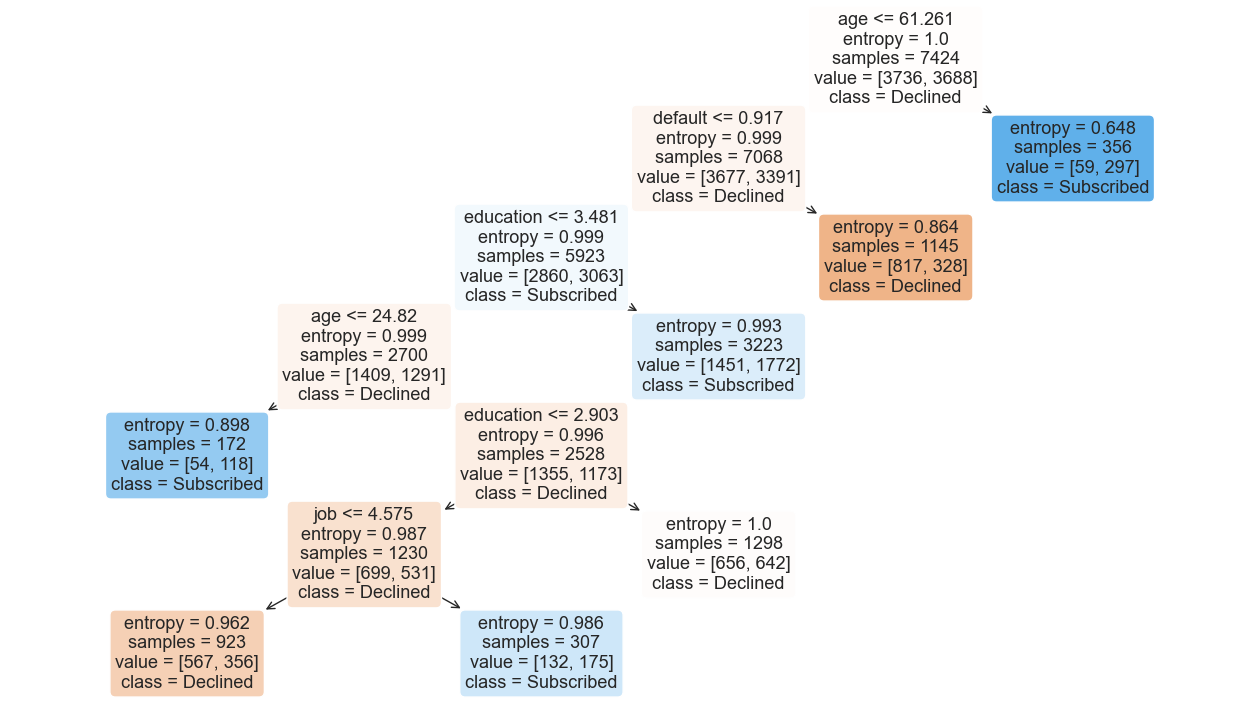

In [285]:
feature_names = X.columns.tolist()

fig = plt.figure(figsize=(16,9))
_ = tree.plot_tree(best_estimator, feature_names=feature_names, class_names=['Declined', 'Subscribed'],
                   filled=True, rounded=True)

In [67]:
pd.DataFrame(best_estimator.feature_importances_).sort_values(0, ascending=False)

,0
0,0.433476
4,0.421141
2,0.099951
3,0.045432
1,0.000000
5,0.000000
6,0.000000


In [68]:
# Most important features.
cols = [0,4,2]
X.columns[cols]

Index(['age', 'default', 'marital'], dtype='object')

## Test the most important features

In [185]:
X_tree = X[['age', 'default']].copy()
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_tree, y, test_size=0.2)
d_tree1 = DecisionTreeClassifier()

In [186]:
# param_grid are the hyper-parameters to tune
# knn__metric is minkowski, standard Euclidean distance
param_grid = {
    #'ccp_alpha': range(0, 10, 1),
    'ccp_alpha': [0, 0.002, 0.0021, 0.0022, 0.0023, 0.0024, 0.0025, 0.0026],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['random', 'best']
}

d_tree_grid1 = GridSearchCV(d_tree1, param_grid, scoring='accuracy', verbose=1, n_jobs=-1).fit(X_train1, y_train1)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [187]:
best_params = d_tree_grid1.best_params_ 
best_score = d_tree_grid1.best_score_ # best cross-validation score
train_score = d_tree_grid1.score(X_train1, y_train1)
test_score = d_tree_grid1.score(X_test1, y_test1) # test accuracy on unseen data
best_estimator = d_tree_grid1.best_estimator_

In [188]:
best_params

{'ccp_alpha': 0.0024, 'criterion': 'log_loss', 'splitter': 'random'}

In [189]:
best_score

0.5816293210632834

In [190]:
train_score

0.5619612068965517

In [191]:
test_score

0.5738146551724138

In [192]:
best_estimator

DecisionTreeClassifier(ccp_alpha=0.0024, criterion='log_loss',
                       splitter='random')

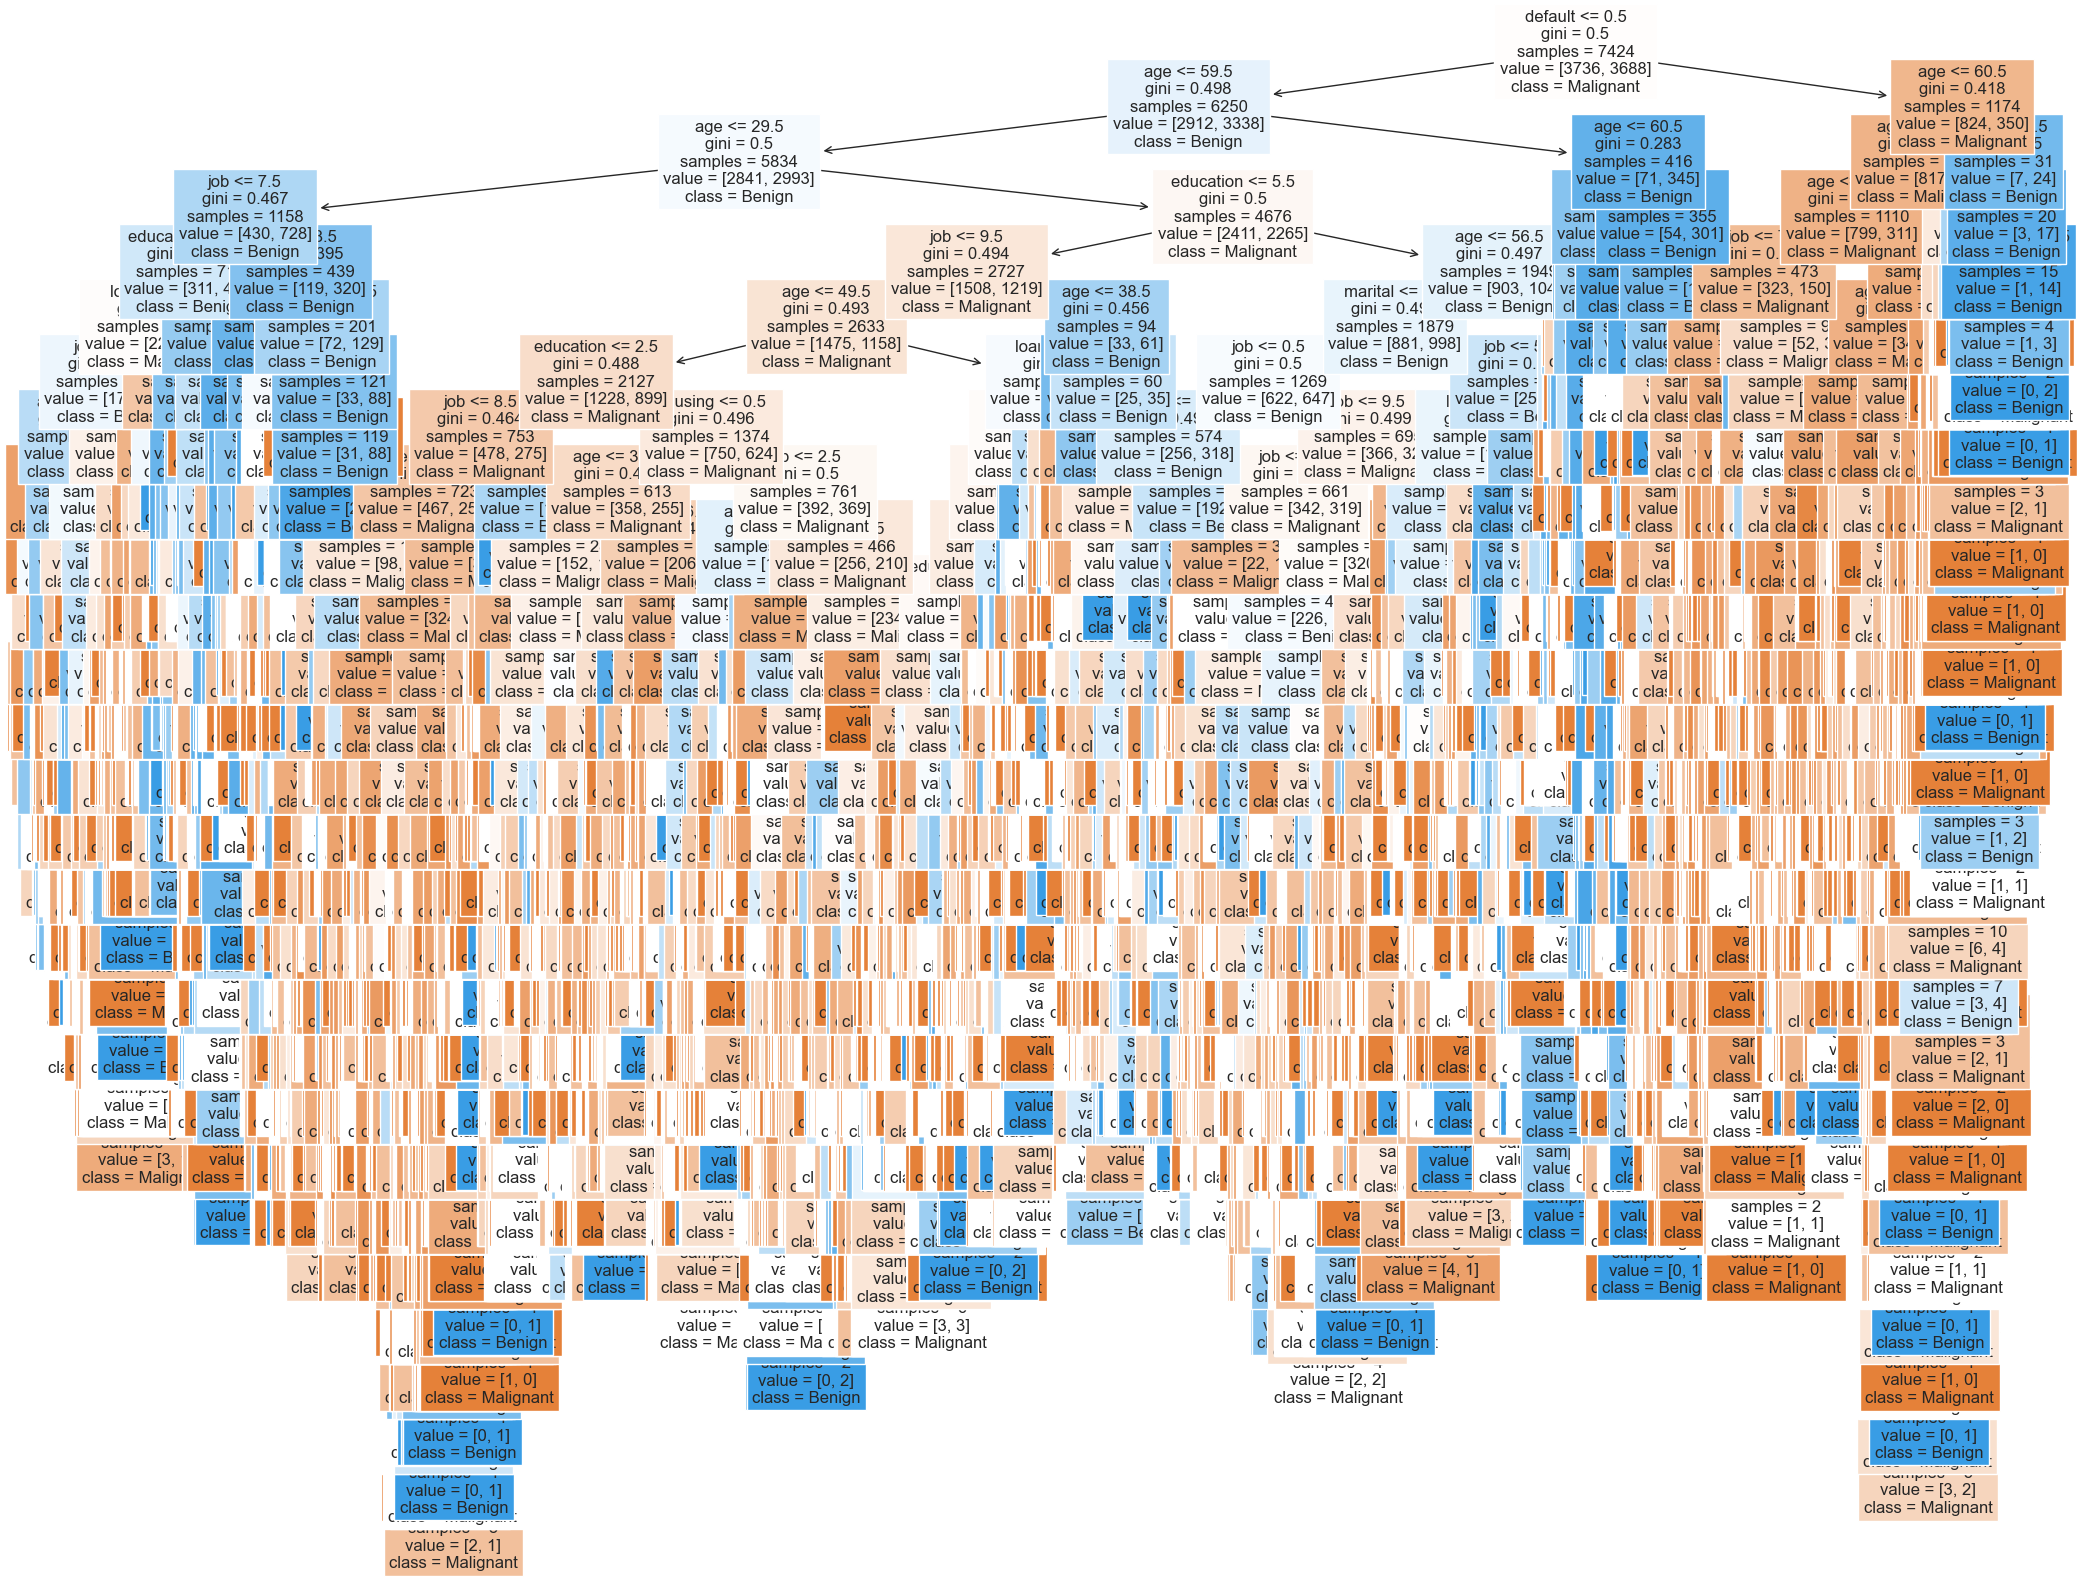

In [238]:
X.age

0       29
1       34
2       42
3       39
4       34
        ..
9275    62
9276    62
9277    37
9278    73
9279    44
Name: age, Length: 9280, dtype: int64

In [250]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


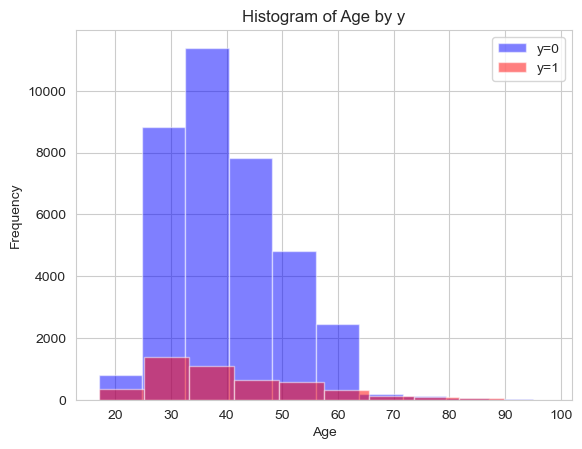

In [253]:
#import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'age' and 'y'

# Filter data for y = 0 and y = 1
df_y0 = df[df['y'] == 0]
df_y1 = df[df['y'] == 1]

# Plot histograms
plt.hist(df_y0['age'], alpha=0.5, color='blue', label='y=0')
plt.hist(df_y1['age'], alpha=0.5, color='red', label='y=1')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age by y')
plt.legend()

# Show plot
plt.show()

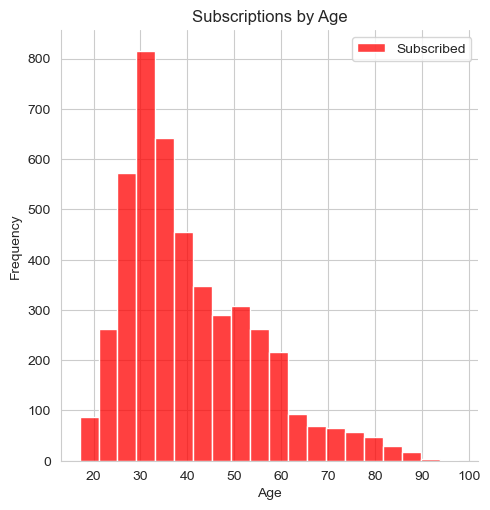

In [257]:
#import seaborn as sns

#sns.displot(df_y0['age'], kind='hist', bins=20, color='blue', label='Declined')
sns.displot(df_y1['age'], kind='hist', bins=20, color='red', label='Subscribed')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Subscriptions by Age')
plt.legend()
plt.show()

/var/folders/w1/62zhz1w55f758h0znl5l9y880000gn/T/ipykernel_7885/2462895180.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_y0['age'], hist=True, kde=False, bins=20, color='blue', label='y=0')
/var/folders/w1/62zhz1w55f758h0znl5l9y880000gn/T/ipykernel_7885/2462895180.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

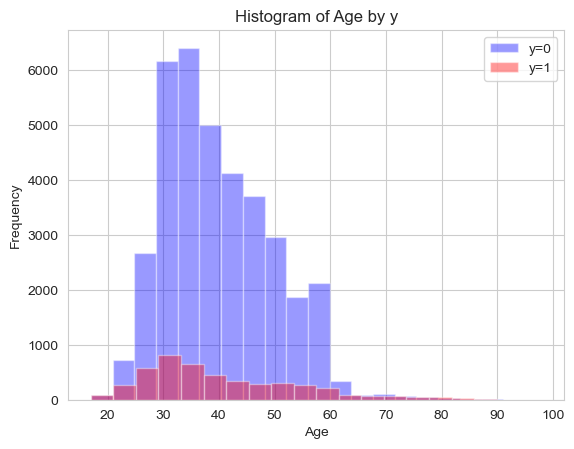

In [255]:
import seaborn as sns

# Set the style
#sns.set_style("whitegrid")

# Plot the histogram using Seaborn's distplot
sns.distplot(df_y0['age'], hist=True, kde=False, bins=20, color='blue', label='y=0')
sns.distplot(df_y1['age'], hist=True, kde=False, bins=20, color='red', label='y=1')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age by y')
plt.legend()

# Show plot
plt.show()


/var/folders/w1/62zhz1w55f758h0znl5l9y880000gn/T/ipykernel_7885/380786596.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y0['label'] = 'Declined'
/var/folders/w1/62zhz1w55f758h0znl5l9y880000gn/T/ipykernel_7885/380786596.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y1['label'] = 'Subscribed'
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


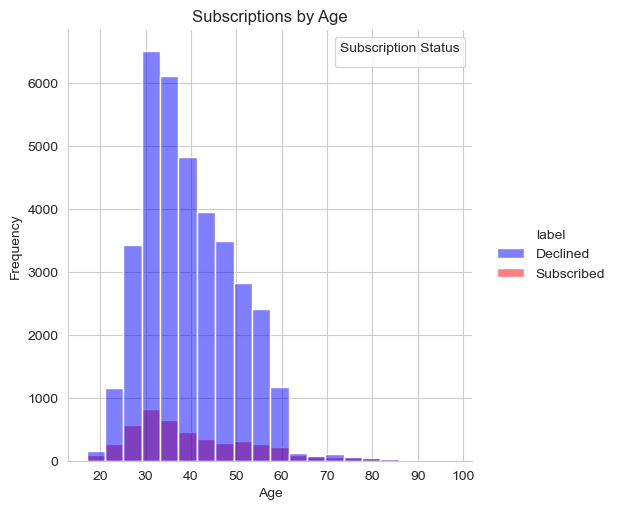

In [256]:
#import seaborn as sns
#
#import matplotlib.pyplot as plt

#sns.set_style('whitegrid')
#sns.set_style("whitegrid")

# Combine both datasets and add a 'label' column to differentiate them
df_y0['label'] = 'Declined'
df_y1['label'] = 'Subscribed'
combined_df = pd.concat([df_y0, df_y1])

# Plot the histograms with hue parameter
sns.displot(data=combined_df, x='age', kind='hist', bins=20, hue='label', palette={'Declined': 'blue', 'Subscribed': 'red'})

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Subscriptions by Age')
plt.legend(title='Subscription Status')
plt.show()


In [198]:
df.y.value_counts()

0    4640
1    4640
Name: y, dtype: int64

## Age and Default are the most important features for the Decision Tree model.

# Logistic Regression

In [163]:
#log_reg = LogisticRegression()
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [164]:
param_grid = {
    'penalty': ['l2'],
    'solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag'],
    #'warm_start': [True],
    'max_iter' : [1000,2000,3000,4000,5000]
}

log_reg_grid = GridSearchCV(log_reg, param_grid, scoring='accuracy', verbose=1, n_jobs=-1, cv=10).fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


In [165]:
best_score = log_reg_grid.best_score_ # best cross-validation score
train_score = log_reg_grid.score(X_train, y_train)
test_score = log_reg_grid.score(X_test, y_test) # test accuracy on unseen data
best_estimator = log_reg_grid.best_estimator_
best_params = log_reg_grid.best_params_ 

In [166]:
best_params

{'max_iter': 3000, 'penalty': 'l2', 'solver': 'sag'}

In [167]:
best_estimator

LogisticRegression(max_iter=3000, solver='sag')

In [168]:
best_score

0.5854030248174336

In [169]:
train_score

0.587957974137931

In [170]:
test_score

0.5942887931034483

In [176]:
# 'age' 0.0179, 'job' 0.0149, 'marital' 0.3487, 'education' 0.0519, 'default' -0.9506, 'housing' 0.0209, 'loan' -0.0373
values = best_estimator.coef_[0]
index = X.columns
# marital
# default
df_lr = pd.DataFrame({'coefficient': values}, index=index)
df_lr

,coefficient
age,0.017931
job,0.014903
marital,0.348819
education,0.051958
default,-0.950617
housing,0.020931
loan,-0.037268


In [177]:
X_lr = X[['marital', 'default']].copy()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_lr, y, test_size=0.2)
lr_1 = LogisticRegression()

In [178]:
param_grid = {
    'penalty': ['l2'],
    'solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag'],
    #'warm_start': [True],
    'max_iter' : [1000,2000,3000,4000,5000]
}

log_reg_grid1 = GridSearchCV(lr_1, param_grid, scoring='accuracy', verbose=1, n_jobs=-1, cv=10).fit(X_train2, y_train2)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


In [179]:
best_score = log_reg_grid1.best_score_ # best cross-validation score
train_score = log_reg_grid1.score(X_train2, y_train2)
test_score = log_reg_grid1.score(X_test2, y_test2) # test accuracy on unseen data
best_estimator = log_reg_grid1.best_estimator_
best_params = log_reg_grid1.best_params_ 

In [180]:
best_score

0.563167279151687

In [181]:
train_score

0.5631734913793104

In [182]:
test_score

0.5571120689655172

In [183]:
best_estimator

LogisticRegression(max_iter=1000)

In [184]:
best_params

{'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}

## Marital and Default are the largest coefficients for the Logistic Regression model.

In [127]:
df.default.value_counts()

no         7821
unknown    1458
yes           1
Name: default, dtype: int64

In [128]:
df.marital.value_counts()

married     5362
single      2877
divorced    1020
unknown       21
Name: marital, dtype: int64

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

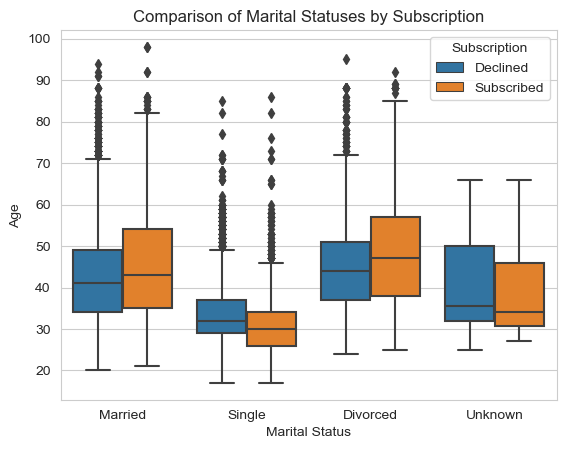

In [407]:
sns.boxplot(data=df, x='marital', y='age', hue='y')

ax = plt.gca()
labels = [label.get_text() for label in ax.get_xticklabels()]
ax.set_xticklabels([label.capitalize() for label in labels])

plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.title('Comparison of Marital Statuses by Subscription')

legend_labels = ['Declined', 'Subscribed']

plt.legend(handles=handles, labels=legend_labels, title='Subscription')
plt.show()

In [137]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,29,admin.,married,university.degree,no,no,yes,cellular,aug,thu,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,34,technician,single,professional.course,unknown,no,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,42,admin.,married,university.degree,no,no,no,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
3,39,housemaid,married,university.degree,no,no,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
4,34,blue-collar,single,high.school,no,no,no,telephone,may,fri,...,5,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,1
9276,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,1
9277,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
9278,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


# Support Vector Machines

In [77]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [95]:
param_grid = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': np.arange(0.1, 1.5, 0.1).tolist(),
    'degree': np.arange(1,6,1).tolist(),
    #'gamma': ['auto']
}

svm_grid = GridSearchCV(svm, param_grid, scoring='accuracy', verbose=1, n_jobs=-1, cv=3).fit(X_train, y_train)

Fitting 3 folds for each of 210 candidates, totalling 630 fits


In [96]:
best_score = svm_grid.best_score_ # best cross-validation score
train_score = svm_grid.score(X_train, y_train)
test_score = svm_grid.score(X_test, y_test) # test accuracy on unseen data
best_estimator = svm_grid.best_estimator_
best_params = svm_grid.best_params_ 

In [97]:
best_score

0.5910561829559405

In [105]:
cross_val_score(svm, X_train, y_train, cv=10).mean()

0.5932079462222432

In [106]:
best_params

{'C': 1.3, 'degree': 1, 'kernel': 'rbf'}

In [107]:
best_estimator

SVC(C=1.3, degree=1)

In [108]:
train_score

0.5964439655172413

In [109]:
test_score

0.5808189655172413

##### Questions

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
* determine if the gender feature is important to the models
    * knn
    * log
    * tree
    * svm
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

# Findings
There were some features that were more important to some models and less important to some other models. The Decision Tree model had the default status and age as the most important features. The logistic regression model had marital status and default as the largest coefficients. A test was done on the models using only the 2 most important features; Logistic Regression using Marital and Default and Decision Trees using only Age and Default. The scores decreased in all metrics. The less important features relationship to the prediction was nonlinear and did have an importance.

The baseline models (default parameters) for K-Nearest Neighbor and Decision Trees had a problem with overfitting. They had really high training scores but when testing against unseen data. There was a 13% and 30% drop, respectively.

The tuning of the models only provided marginal increases listed in the table below. This tuning helped with the overfitting models. The models used multiple cross-validation folds ranging from 5 to 10 and did not make a difference in the accuracy.

There were multiple parameters changed like class weighting and thresholds that slightly improved the accuracy. This did not really help because of the class imbalance. There were some models that had a high precision score but low recall score, and vice versa. The current machine learning models have trouble with imbalanced classes. There were features that had a linear relationship but the majority was non-linear. 

# Next steps and Recommendation

The next step is to:
* Use random forest.
* Use ensemble methods.
* use a more advanced model like, neural networks to identify patterns from these complex features.

The Random Forest model will help with the imbalanced classes by using multiple decision trees. The decision tree visualization was pretty narrow and showed a bias towards the default class because the no category made up 79% of the class. The random forest algorithm will add more diversity and make the tree wider.

The ensemble techniques add more diversity to models and helps with improving predictions. There are two techniquest bagging and boosting. The bagging technique will aggregate of all the models prediction into a single prediction. The boosting model will iteratively improve the prediction by reducing residual errors using the previous models as input for subsequent models. Using combined models have proven to be better at increasing prediction accuracy versus using a single model.

The feature relationships are non-linear and are difficult for these models to make accurate predictions. Using a Neural Network will help identify patterns and relationships from this data. A artificial neural network will be able to work with incomplete knowledge.


It is recommended that the marketing team focus on using the most important metrics; age, marital and campaigns. The age groups that were 
most subsribed were the 30 - 40 age range. The marital category that were most subscribed was the married and divorced. The majority of customers that subscribed were made with less than 5 contacts. I suggest the marketing team create a marketing campaign targeting the 30 to 40 age range, who are married or previously married, with a limit of 5 contacts per customer.



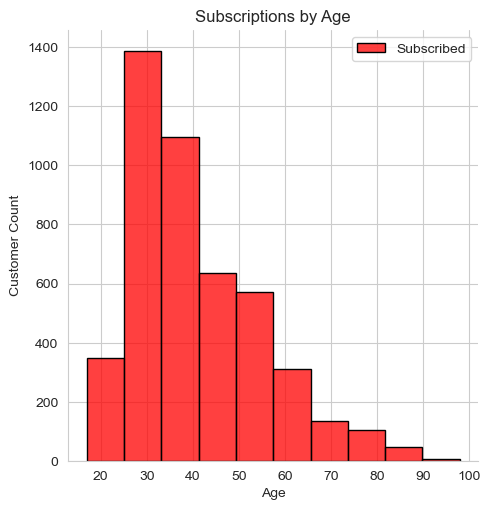

In [328]:
#import seaborn as sns

#sns.displot(df_y0['age'], kind='hist', bins=20, color='blue', label='Declined')
sns.displot(df_y1['age'], kind='hist', bins=10, color='red', label='Subscribed', edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Customer Count')
plt.title('Subscriptions by Age')
plt.legend()
plt.show()

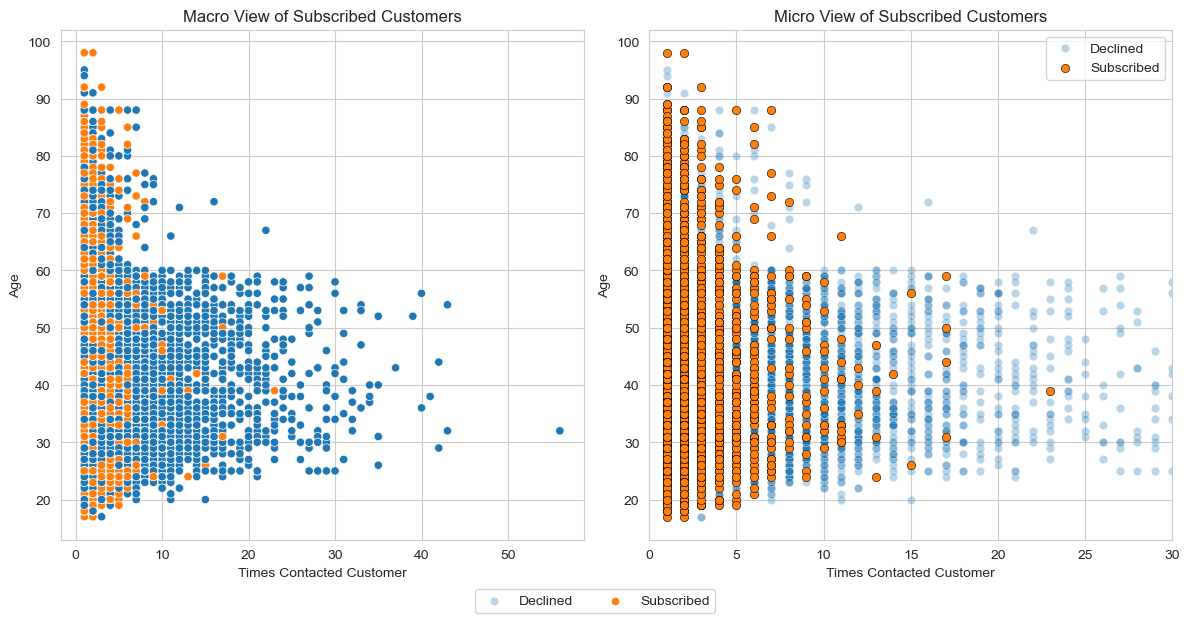

In [330]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
xlabel = 'Times Contacted Customer'
ylabel = 'Age'


# Plot the first scatter plot
sns.scatterplot(data=df, x='campaign', y='age', hue='y', ax=axs[0], legend=False)
axs[0].set_title('Macro View of Subscribed Customers')
axs[0].set_xlabel(xlabel)
axs[0].set_ylabel(ylabel)

sns.scatterplot(data=df[df['y'] == 0], x='campaign', y='age',  alpha=0.3, label='Declined', ax=axs[1])
sns.scatterplot(data=df[df['y'] == 1], x='campaign', y='age', edgecolor='black', linewidth=0.4, label='Subscribed', ax=axs[1])
axs[1].set_title('Micro View of Subscribed Customers')
axs[1].set_xlabel(xlabel)
axs[1].set_ylabel(ylabel)
axs[1].set_xlim(0, 30)

fig.legend(handles, custom_labels, loc='upper center', bbox_to_anchor=(0.5, 0.02), ncol=2)

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()


In [265]:
df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [270]:
df.y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

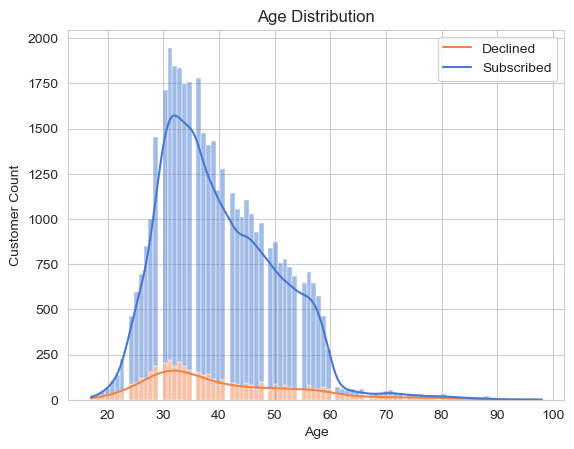

In [342]:
sns.histplot(data=df, x='age', hue='y', kde=True, multiple='stack', palette='muted')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Customer Count')
plt.legend(['Declined', 'Subscribed'])
plt.show()